In [1]:
import os

In [2]:
folder_path = '../data/raw/ml-100k'
extracted_files = os.listdir(folder_path)
extracted_files.sort()
extracted_files

['README',
 'allbut.pl',
 'mku.sh',
 'u.data',
 'u.genre',
 'u.info',
 'u.item',
 'u.occupation',
 'u.user',
 'u1.base',
 'u1.test',
 'u2.base',
 'u2.test',
 'u3.base',
 'u3.test',
 'u4.base',
 'u4.test',
 'u5.base',
 'u5.test',
 'ua.base',
 'ua.test',
 'ub.base',
 'ub.test']

In [3]:
import pandas as pd

# Paths to the key data files
ratings_file = os.path.join(folder_path, 'u.data')
movies_file = os.path.join(folder_path, 'u.item')
users_file = os.path.join(folder_path, 'u.user')

# Loading the data files
ratings_df = pd.read_csv(ratings_file, sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
movies_df = pd.read_csv(movies_file, sep='|', encoding='latin-1', names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDB_URL'] + ['genre'+str(i) for i in range(19)])
users_df = pd.read_csv(users_file, sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

# Displaying the first few rows of each DataFrame
(ratings_df.head(), movies_df.head(), users_df.head())


(   user_id  movie_id  rating  timestamp
 0      196       242       3  881250949
 1      186       302       3  891717742
 2       22       377       1  878887116
 3      244        51       2  880606923
 4      166       346       1  886397596,
    movie_id              title release_date  video_release_date  \
 0         1   Toy Story (1995)  01-Jan-1995                 NaN   
 1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
 2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
 3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
 4         5     Copycat (1995)  01-Jan-1995                 NaN   
 
                                             IMDB_URL  genre0  genre1  genre2  \
 0  http://us.imdb.com/M/title-exact?Toy%20Story%2...       0       0       0   
 1  http://us.imdb.com/M/title-exact?GoldenEye%20(...       0       1       1   
 2  http://us.imdb.com/M/title-exact?Four%20Rooms%...       0       0       0   
 3  http://us.imdb.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

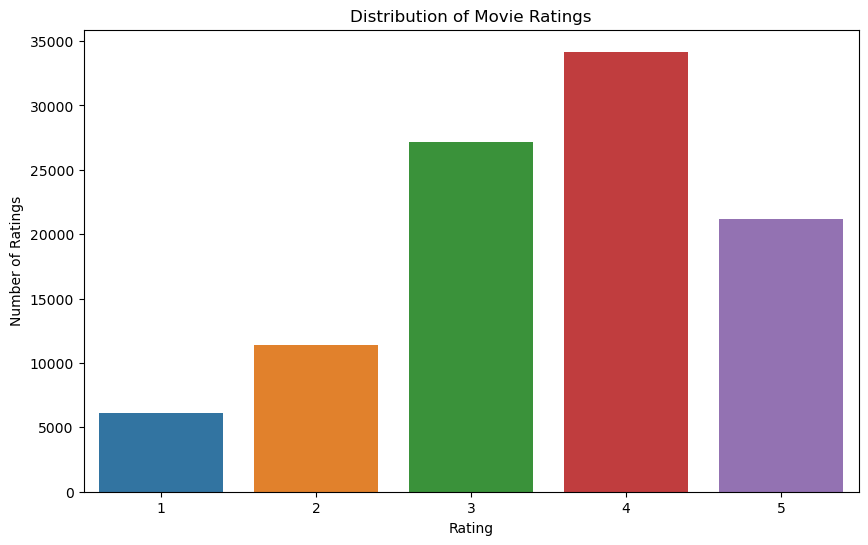

In [5]:
# Ratings Distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings_df)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

In [6]:
# Analyse users

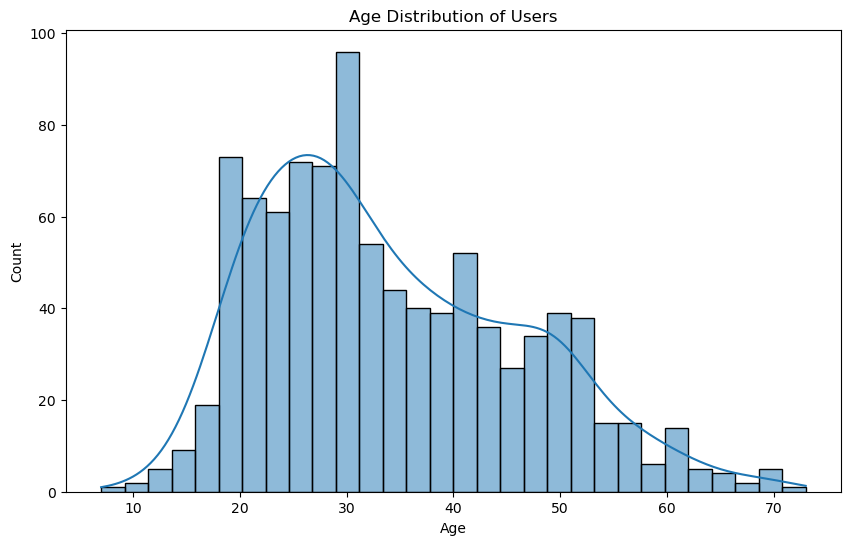

In [7]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(users_df['age'], bins=30, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

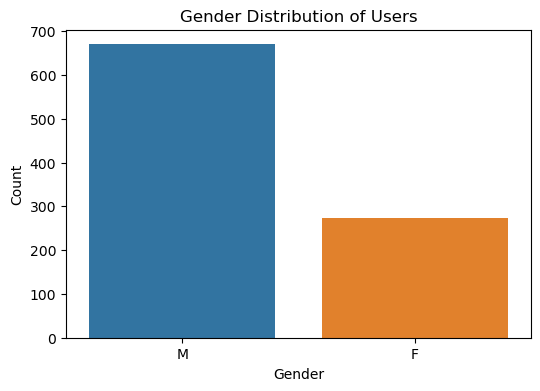

In [8]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=users_df)
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

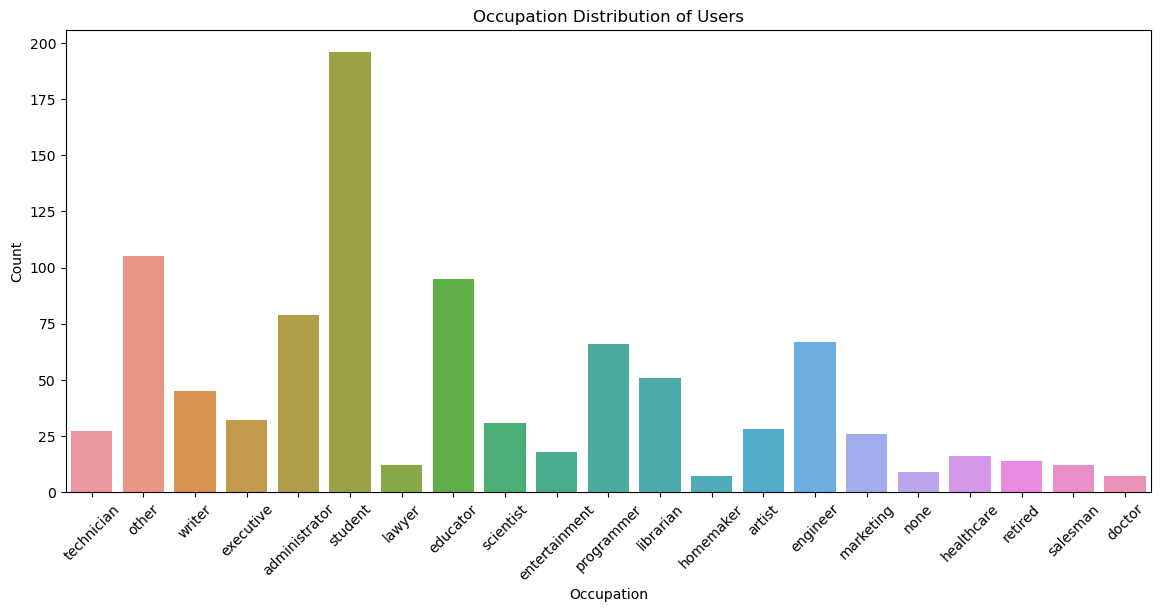

In [9]:
# Occupation distribution
plt.figure(figsize=(14, 6))
sns.countplot(x='occupation', data=users_df)
plt.xticks(rotation=45)
plt.title('Occupation Distribution of Users')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

In [10]:
# Movies Analysis

In [11]:
# Extracting release year from the title
movies_df['release_year'] = movies_df['title'].str.extract(r'\((\d{4})\)')
movies_df['release_year'] = pd.to_numeric(movies_df['release_year'], errors='coerce')


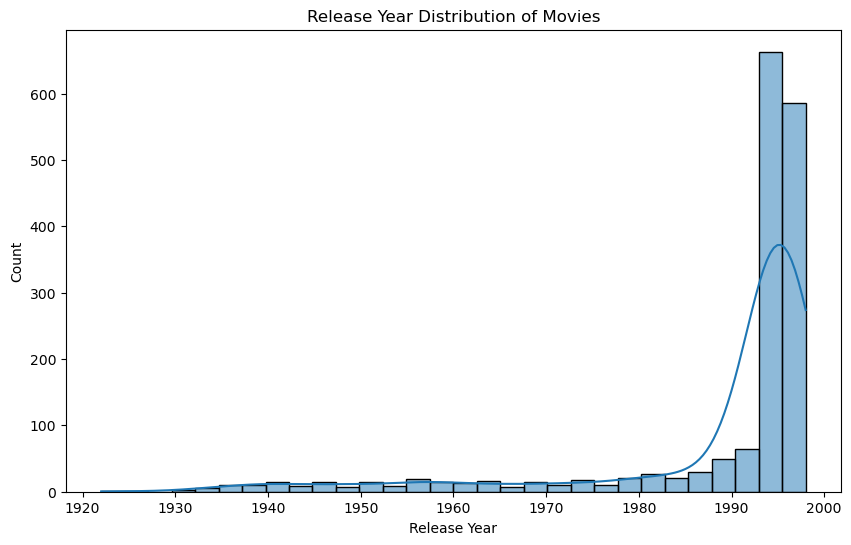

In [12]:
# Release year distribution
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['release_year'].dropna(), bins=30, kde=True)
plt.title('Release Year Distribution of Movies')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


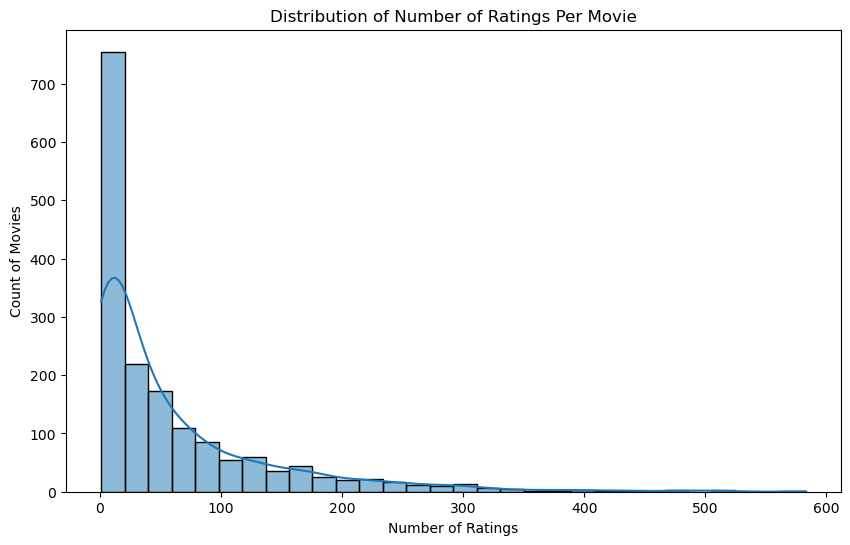

In [13]:
# Number of ratings per movie
ratings_per_movie = ratings_df.groupby('movie_id').size()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=30, kde=True)
plt.title('Distribution of Number of Ratings Per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Movies')
plt.show()


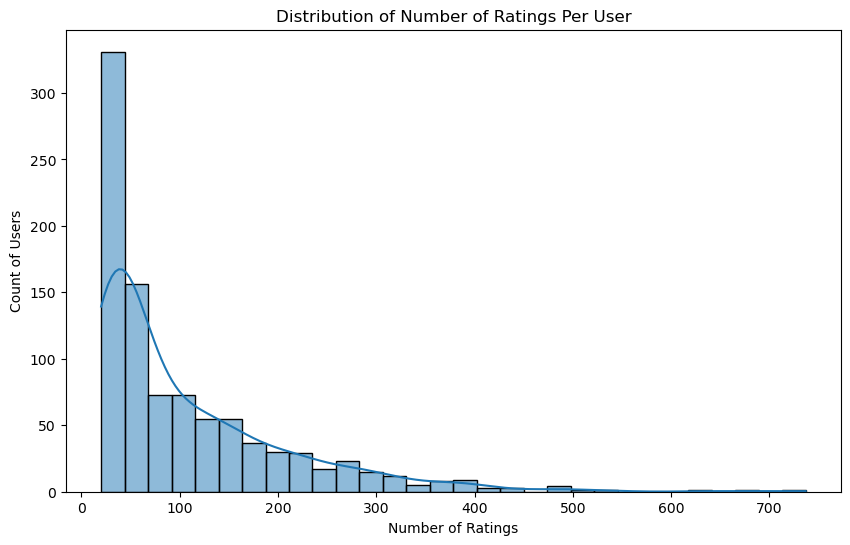

In [14]:
# Ratings Per User
ratings_per_user = ratings_df.groupby('user_id').size()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=30, kde=True)
plt.title('Distribution of Number of Ratings Per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.show()
